# Titanic Prediction

###  Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train_data = pd.read_csv("https://github.com/TedMcG7/githubmain/tree/main/datasets/train.csv")
test_data = pd.read_csv("https://github.com/TedMcG7/githubmain/tree/main/datasets/test.csv")

Breakdown of Data Transformation Function

In [4]:
train_data["All_Titles"] = pd.Series([i.split(",")[1].split(" ")[1].strip() for i in train_data["Name"]])

In [ ]:
train_data['All_Titles'].value_counts()

In [6]:
train_data['Title'] = train_data['All_Titles'].map(lambda i: i if i in ['Mr.','Mrs.', 'Miss.', 'Master.'] else 'Other')

In [7]:
train_data['Title'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Other       27
Name: Title, dtype: int64

In [9]:
train_data.drop('All_Titles', axis=1, inplace=True)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

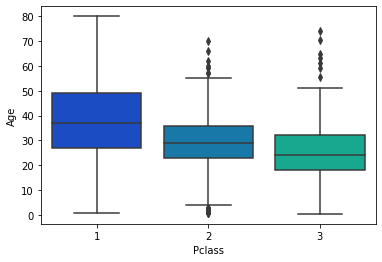

In [11]:
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

<AxesSubplot:xlabel='Title', ylabel='Age'>

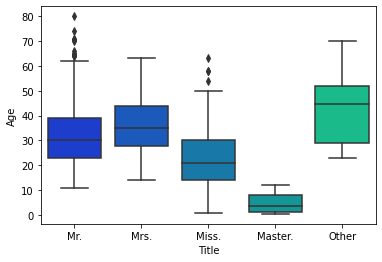

In [12]:
sns.boxplot(x='Title',y='Age',data=train_data,palette='winter')

In [13]:
train_data[['Pclass','Age']].groupby('Pclass').median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [22]:
def impute_age(cols):
    Age = cols[1]
    Title = cols[0]
    if pd.isnull(Age):
        
        if Title == 'Mr.':
            return 30.0
        elif Title == 'Mrs.':
            return 35.0
        elif Title == 'Miss.':
            return 21.0
        elif Title == 'Master.':
            return 3.5
        else:
            return 44.5
    else:
        return Age

In [15]:
train_data['Age'] = train_data[['Title', 'Age']].apply(impute_age,axis=1)

In [18]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Back to Original train_data

In [27]:
train_data = pd.read_csv("C:/Users/tedmc/OneDrive/My Documents/Data/DataScience/train.csv")

In [28]:
def trans(data):
    threshold = data['Fare'].quantile(.997)
    data = data[data['Fare'] < threshold]
    data["All_Titles"] = pd.Series([i.split(",")[1].split(" ")[1].strip() for i in data["Name"]])
    data['Title'] = data['All_Titles'].map(lambda i: i if i in ['Mr.','Mrs.', 'Miss.', 'Master.'] else 'Other')
    data.drop('All_Titles', axis = 1, inplace=True)
    data['Age'] = data[['Title', 'Age']].apply(impute_age,axis=1)
    data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
    data['Embarked'].dropna(inplace=True) 
    data.drop(['Cabin','Name', 'Title'],axis=1, inplace=True)  # Included Embarked
    return data

In [29]:
train_data_trans = trans(train_data)

<ipython-input-28-15def20c3794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["All_Titles"] = pd.Series([i.split(",")[1].split(" ")[1].strip() for i in data["Name"]])
<ipython-input-28-15def20c3794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['All_Titles'].map(lambda i: i if i in ['Mr.','Mrs.', 'Miss.', 'Master.'] else 'Other')
C:\Users\tedmc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [30]:
train_data_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Sex          888 non-null    object 
 4   Age          888 non-null    float64
 5   SibSp        888 non-null    int64  
 6   Parch        888 non-null    int64  
 7   Ticket       888 non-null    object 
 8   Fare         888 non-null    float64
 9   Embarked     886 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.3+ KB


In [31]:
y_train = train_data_trans['Survived']

In [32]:
X_train = train_data_trans.drop(['PassengerId','Survived', 'Ticket'], axis=1)

In [33]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,44.5,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


### Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ["Pclass", "SibSp", "Age","Fare","Parch"]
cat_attribs = ["Sex", "Embarked"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop='first'), cat_attribs),  # Added drop='first'
    ])

X_train = full_pipeline.fit_transform(X_train)

### Random Forest Model

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier()
param_grid = {'n_estimators': [10, 20, 50, 100], 'max_depth': [3, 4, 5, 10], 'random_state': [1, 5, 10]}
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 50, 'random_state': 5}

In [37]:
grid_search.best_score_

0.8322072072072073

In [38]:
# grid_search.best_estimator_

In [39]:
# forest_clf = RandomForestClassifier(n_estimators=50, max_depth=4, random_state=5)
# forest_clf.fit(X_train, y_train)
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
# accuracy_score(y_train, y_train_pred)
# confusion_matrix(y_train, y_train_pred)

In [40]:
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1 score:', f1_score(y_train, y_train_pred))
print('ROC:', roc_auc_score(y_train, y_train_pred))

Precision: 0.7476340694006309
Recall: 0.6991150442477876
F1 score: 0.7225609756097562
ROC: 0.7766977771330013


In [41]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.77364865, 0.82094595, 0.80067568])

### Learning Curve 

In [42]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

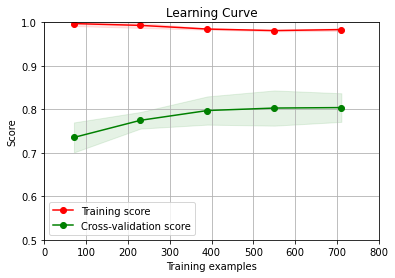

In [43]:
g = plot_learning_curve(forest_clf,"Learning Curve", X_train, y_train)
plt.axis([0, 800, .5, 1])                        
plt.show() 

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

param_grid = {'degree': [2,3,4], 'coef0': [1, 2, 3], 'C': [1, 5, 10]}
svm_clf = SVC(kernel = 'poly')
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
svm_clf = SVC(degree=2, coef0=1, probability=True, C=5)
svm_clf.fit(X_train, y_train)
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
accuracy_score(y_train, y_train_pred)
# confusion_matrix(y_train, y_train_pred)

In [ ]:
g = plot_learning_curve(svm_clf,"Learning Curve", X_train, y_train)
plt.axis([0, 800, .5, 1])                        
plt.show() 

### KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [7, 8, 9, 10], 'weights': ['uniform', 'distance']}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

In [123]:
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_clf.fit(X_train, y_train)
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
accuracy_score(y_train, y_train_pred)
# confusion_matrix(y_train, y_train_pred)

0.8029279279279279

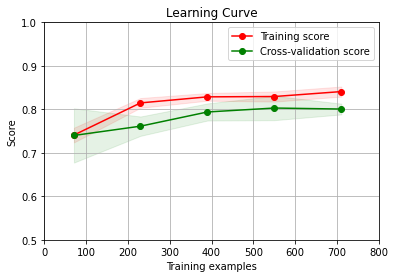

In [124]:
g = plot_learning_curve(knn_clf,"Learning Curve", X_train, y_train)
plt.axis([0, 800, .5, 1])                        
plt.show() 

### Ensemble

In [127]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', forest_clf), ('knn', knn_clf)], voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [128]:
y_train_pred = voting_clf.predict(X_train)
voting_clf.fit(X_train, y_train)
y_train_pred = voting_clf.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[534,  15],
       [ 46, 293]], dtype=int64)

In [129]:
print('Accuracy:', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1 score:', f1_score(y_train, y_train_pred))
print('ROC:', roc_auc_score(y_train, y_train_pred))

Accuracy: 0.9313063063063063
Precision: 0.9512987012987013
Recall: 0.8643067846607669
F1 score: 0.9057187017001546
ROC: 0.9184921901445912


### Prepare Test Data

In [310]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [311]:
def trans_test(data):
    data["All_Titles"] = pd.Series([i.split(",")[1].split(" ")[1].strip() for i in data["Name"]])
    data['Title'] = data['All_Titles'].map(lambda i: i if i in ['Mr.','Mrs.', 'Miss.', 'Master.'] else 'Other')
    data = data.drop('All_Titles', axis = 1)
    data['Age'] = data[['Title','Age']].apply(impute_age,axis=1)
    data.Fare = data.Fare.fillna(data.Fare.mean())
    data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    return data

In [312]:
test_data2 = trans_test(test_data)

In [313]:
test_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [320]:
X_test = full_pipeline.transform(test_data2)
y_test_pred = voting_clf.predict(X_test)

In [315]:
ids = test_data['PassengerId']
output = pd.DataFrame({'PassengerId': ids, 'Survived': y_test_pred})
output.to_csv('my_submission.csv', index=False)